<a href="https://colab.research.google.com/github/SubhanMirza56/Neural-Network/blob/main/object_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets

In [51]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [52]:
X_train.shape

(50000, 32, 32, 3)

In [53]:
y_train.shape

(50000, 1)

In [54]:
X_test.shape

(10000, 32, 32, 3)

In [55]:
y_test.shape

(10000, 1)

In [56]:
X_train[:4]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [57]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [58]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [59]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [60]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [61]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


array([[[ 60,  82,  54],
        [ 40,  68,  36],
        [ 52,  81,  52],
        ...,
        [ 53,  43,  50],
        [ 66,  55,  61],
        [ 73,  62,  68]],

       [[112, 114, 114],
        [ 58,  71,  56],
        [ 58,  81,  53],
        ...,
        [ 54,  47,  53],
        [ 67,  58,  65],
        [ 72,  62,  69]],

       [[170, 161, 178],
        [119, 118, 120],
        [ 80,  89,  74],
        ...,
        [ 56,  50,  56],
        [ 70,  63,  70],
        [ 72,  64,  71]],

       ...,

       [[ 91, 113,  94],
        [ 59,  83,  62],
        [ 45,  65,  45],
        ...,
        [ 32,  56,  30],
        [ 26,  46,  26],
        [ 25,  42,  23]],

       [[ 99, 119, 102],
        [ 64,  86,  67],
        [ 55,  75,  55],
        ...,
        [ 42,  71,  39],
        [ 42,  68,  37],
        [ 40,  64,  32]],

       [[105, 122, 108],
        [ 70,  92,  74],
        [ 59,  79,  60],
        ...,
        [ 43,  66,  40],
        [ 46,  70,  42],
        [ 45,  71,  40]]], dtype=uint8)
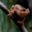

In [62]:
X_train[5000]

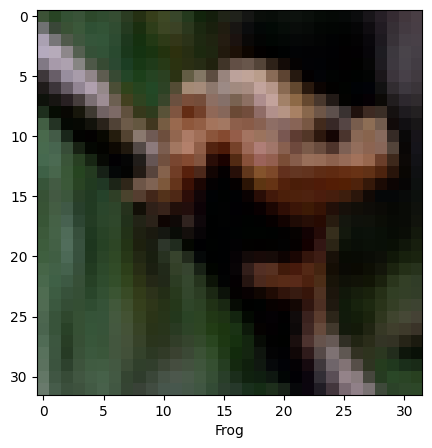

In [63]:
import matplotlib.pyplot as plt

def plot_samples(X,y,index):
  plt.figure(figsize=(10,5))
  plt.imshow(X[index])
  plt.xlabel(class_names[y[index]])
  plt.show()

plot_samples(X_train,y_train,5000)

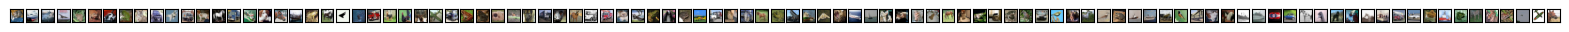

In [64]:
import matplotlib.pyplot as plt
n = 100
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [65]:
import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape the data to have a single channel


In [66]:
from keras.utils import to_categorical
classes = 10
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)


In [83]:
rows,columns,channel = 32,32,3

filter = [16,32,64,128]

classes = 10

In [110]:
from keras.models import Sequential
# Change the import path for Dense and Flatten
from keras.layers import Dense, Flatten
# Correct the import path for Conv2D and MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout



In [111]:
model = Sequential()
model.add(Conv2D(filter[0], (3, 3),padding='same' ,activation='relu', input_shape=(rows, columns, channel)))
model.add(MaxPooling2D(pool_size=(2, 2)),Dropout(0.25))

model.add(Conv2D(filter[1], (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)),Dropout(0.25))

model.add(Conv2D(filter[2], (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)),Dropout(0.25))


model.add(Conv2D(filter[3], (2, 2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)),Dropout(0.25))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(classes, activation='softmax'))
optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 6, 6, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 3, 3, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,474 (189.35 KB)

 Trainable params: 48,474 (189.35 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.fit(X_train, y_train, batch_size=128, epochs=20,validation_split=0.1 )

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1868 - loss: 2.1246 - val_accuracy: 0.3412 - val_loss: 1.7597
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3684 - loss: 1.7086 - val_accuracy: 0.4332 - val_loss: 1.5701
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4683 - loss: 1.4661 - val_accuracy: 0.5064 - val_loss: 1.3823
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5193 - loss: 1.3414 - val_accuracy: 0.5356 - val_loss: 1.2878
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5381 - loss: 1.2825 - val_accuracy: 0.5634 - val_loss: 1.2054
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5747 - loss: 1.2046 - val_accuracy: 0.5742 - val_loss: 1.1802
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5975 - loss: 1.1420 - val_accuracy: 0.5916 - val_loss: 1.1483
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6178 - loss: 1.0891 - val_accuracy: 0

In [113]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6699 - loss: 0.9612


[0.967261016368866, 0.6703000068664551]

In [115]:
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [116]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(5), np.int64(1), np.int64(8), np.int64(0), np.int64(6)]

In [117]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [118]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_classes = np.argmax(y_test, axis=1)
print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes))
print("confusion metrics:\n",confusion_matrix(y_test_classes, y_pred_classes))
print("Accuracy:",accuracy_score(y_test_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.82      0.70      1000
           1       0.78      0.82      0.80      1000
           2       0.55      0.57      0.56      1000
           3       0.60      0.27      0.38      1000
           4       0.59      0.67      0.62      1000
           5       0.58      0.59      0.59      1000
           6       0.71      0.78      0.74      1000
           7       0.71      0.71      0.71      1000
           8       0.86      0.71      0.78      1000
           9       0.75      0.75      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000

confusion metrics:
 [[820  25  45   2  23   3   8   5  44  25]
 [ 39 823   1   1   6   5  13   6  12  94]
 [ 96   7 573  19 115  68  69  31  10  12]
 [ 49  12 100 272 108 223 

In [119]:
mask = range(20,50)

X_valid = X_test[:10]
y_valid = y_test[:10]

y_pred_probs_valid  = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


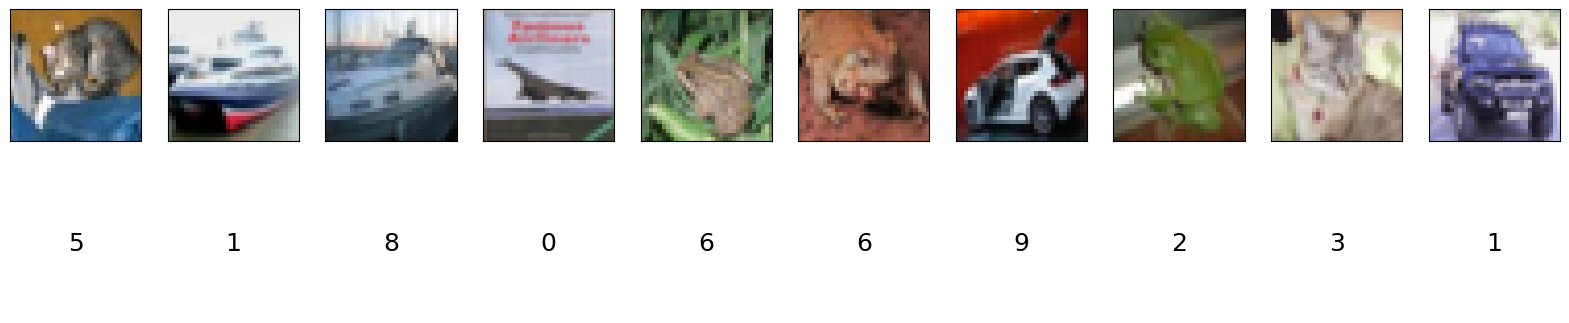

In [120]:
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1+n)
    plt.text(0.5,0.5,str(predicted_digit), fontsize=18 ,ha='center',va='center')
    plt.axis('off')
plt.show()
plt.close()

In [77]:
model.save()